In [1]:
# Import the dependencies. 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations. 
lats = np.random.uniform(low=-90.000, high=90.000, size = 1500)
lngs = np.random.uniform(low=-180, high=180, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Unzip lats and lngs
#lats, lngs = zip(*lat_lngs)

In [4]:
# Add the latitudes and longitudes to a list. 
coordinates = list(lat_lngs)

In [5]:
#Use the print() function to display the latitude and longitude combinations. 
for coordinate in coordinates: 
    print(coordinate[0], coordinate[1])

89.64476255137319 109.95359479743519
-81.02728234646388 8.281836297247736
37.402694786008894 25.71501759242335
-78.0899097119113 100.91326336504312
-50.95244441590586 -114.09692850847313
-18.895541219768845 121.17281970265645
-37.053730274402206 -25.786266691803775
39.417695448830045 134.68577047436503
-6.798906108000779 -39.86164023035536
59.93860504233254 132.52759692180842
-85.16269467522204 44.58127857269383
21.478051186789727 110.0627550672761
-56.90688104948739 19.189463430605315
-56.54517769245117 127.00778927711565
-30.041655240695924 -1.1967528597801333
-42.40187796639267 -174.63999098505423
0.11028640077597629 54.4572567766931
16.771060039111475 -154.93001273726247
59.9508558822026 148.75352698741136
-85.18247492078476 -60.8426976028217
75.81594766119323 -117.08921753043083
-38.07052452402524 135.30551782611172
-24.321848850307063 35.80176082242335
-67.55845491419393 114.97962834870003
-80.16056569938712 95.7595314614826
31.878434466153905 -111.96151856213586
33.9823297491463

-13.106937220999242 76.23896732590794
-67.63787690229428 20.873054746139786
84.82964314600062 -161.85826010889028
-18.850291817979084 163.76233121089763
-6.9341814552253425 -126.85537517973636
-37.23976821246937 -128.33695238093816
51.42619070829636 -113.8289772400952
-12.26022459632486 -165.67347787262818
-28.427455825113356 44.9535579210644
-0.980214901206736 112.60339034676406
18.48437791672086 -21.875226820722077
87.4815818557733 170.59163255370368
-41.605014302185 -146.88678981723106
-59.06061613511973 35.238473664845145
30.255615963711918 -1.7481279621712815
-57.55551128072909 35.71791611225984
-83.29337927854755 -179.26916836448333
-18.426546586986802 -28.60552443093144
84.88013483769197 140.2804554712169
-60.995840564049594 101.37875114943552
-4.663879626188134 8.806250695435295
-89.95503763530921 102.70546479951656
27.936635452515688 -77.02452627483848
20.778322609842647 -44.3565072213876
-28.294853861182766 -42.53846470883724
70.33264939659455 -125.06525686912806
29.638655220

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities. 
cities = []
# Identify the nearest city for each latitude and longitude combination. 
for coordinate in coordinates: 
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list. 
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count. 
len(cities)

608

In [8]:
# Import the requests library. 
import requests

# Import the API key. 
from config import weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library. 
import time
from datetime import datetime

In [29]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [30]:
# Creating an empty list to hold the weather data. 
city_data = []
# Print the beginning of the logging. 
print("Begginning Data Retrieval    ")
print("-----------------------------")

# Create counters. 
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

# # Loop through all the cities in our list. 
# for i in range(len(cities)):
    
#     # Group cities in sets of 50 for logging purposes. 
#     if (i % 5- == 0 and i >= 50):
#         set_count += 1
#         record_count += 1
#         time.sleep(60)
        
#     # Create endpoint URL with each city. 
#     city_url = url + "&q=" + cities[i]

Begginning Data Retrieval    
-----------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | ano mera
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | broome
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | wajima
Processing Record 9 of Set 1 | assare
Processing Record 10 of Set 1 | amga
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | suicheng
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | mount gambier
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | victoria
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | arman
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | port lincoln
Processing Record 23 of Set 1 | inhambane
Pro

Processing Record 38 of Set 4 | pevek
Processing Record 39 of Set 4 | vila velha
Processing Record 40 of Set 4 | birjand
Processing Record 41 of Set 4 | okha
Processing Record 42 of Set 4 | scarborough
Processing Record 43 of Set 4 | torbay
Processing Record 44 of Set 4 | eyl
Processing Record 45 of Set 4 | rabak
Processing Record 46 of Set 4 | christchurch
Processing Record 47 of Set 4 | verkhoyansk
Processing Record 48 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 49 of Set 4 | ranot
Processing Record 50 of Set 4 | bay roberts
Processing Record 1 of Set 5 | hithadhoo
Processing Record 2 of Set 5 | cherskiy
Processing Record 3 of Set 5 | hay river
Processing Record 4 of Set 5 | arkhangelos
City not found. Skipping...
Processing Record 5 of Set 5 | talnakh
Processing Record 6 of Set 5 | ribeira grande
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | namibe
Processing Record 9 of Set 5 | teixeira
Processing Record 10 of Set 5 | uruzgan
Proces

Processing Record 28 of Set 8 | leh
Processing Record 29 of Set 8 | tessalit
Processing Record 30 of Set 8 | isangel
Processing Record 31 of Set 8 | tilichiki
Processing Record 32 of Set 8 | olafsvik
Processing Record 33 of Set 8 | szendro
Processing Record 34 of Set 8 | bonoua
Processing Record 35 of Set 8 | abu kamal
Processing Record 36 of Set 8 | quatre cocos
Processing Record 37 of Set 8 | altamont
Processing Record 38 of Set 8 | geraldton
Processing Record 39 of Set 8 | poum
Processing Record 40 of Set 8 | abu dhabi
Processing Record 41 of Set 8 | atambua
Processing Record 42 of Set 8 | hun
Processing Record 43 of Set 8 | santa isabel do rio negro
Processing Record 44 of Set 8 | bambous virieux
Processing Record 45 of Set 8 | palauig
Processing Record 46 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 47 of Set 8 | artesia
Processing Record 48 of Set 8 | laguna
Processing Record 49 of Set 8 | araouane
Processing Record 50 of Set 8 | teguise
Processing Recor

Processing Record 20 of Set 12 | borogontsy
Processing Record 21 of Set 12 | mehamn
Processing Record 22 of Set 12 | kashin
Processing Record 23 of Set 12 | hidalgotitlan
Processing Record 24 of Set 12 | pleshanovo
Processing Record 25 of Set 12 | flin flon
Processing Record 26 of Set 12 | mercedes
Processing Record 27 of Set 12 | ambilobe
Processing Record 28 of Set 12 | zwedru
Processing Record 29 of Set 12 | faya
Processing Record 30 of Set 12 | vila
Processing Record 31 of Set 12 | richards bay
Processing Record 32 of Set 12 | havoysund
Processing Record 33 of Set 12 | panlaitan
Processing Record 34 of Set 12 | general roca
Processing Record 35 of Set 12 | uttarkashi
Processing Record 36 of Set 12 | crab hill
City not found. Skipping...
Processing Record 37 of Set 12 | komsomolskiy
Processing Record 38 of Set 12 | mentok
City not found. Skipping...
Processing Record 39 of Set 12 | guajara-mirim
City not found. Skipping...
Processing Record 40 of Set 12 | cristobal obregon
Processin

In [31]:
# Convert the array of dictionaries to a Pandas Dataframe. 
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,25.23,95,88,8.28,RU,2022-09-27 14:19:05
1,Hermanus,-34.4187,19.2345,65.80,67,1,9.89,ZA,2022-09-27 14:19:06
2,Ano Mera,37.4500,25.4000,79.43,57,40,20.71,GR,2022-09-27 14:19:07
3,Albany,42.6001,-73.9662,59.43,76,66,5.68,US,2022-09-27 14:19:08
4,Rikitea,-23.1203,-134.9692,67.95,59,30,7.99,PF,2022-09-27 14:19:08
5,Broome,42.2506,-75.8330,57.85,80,100,9.22,US,2022-09-27 14:19:09
6,Arraial Do Cabo,-22.9661,-42.0278,84.16,88,75,5.75,BR,2022-09-27 14:19:10
7,Wajima,37.4000,136.9000,64.96,85,100,17.65,JP,2022-09-27 14:19:10
8,Assare,-6.8744,-39.8750,93.06,25,5,6.26,BR,2022-09-27 14:19:12
9,Amga,60.8953,131.9608,26.55,98,97,2.19,RU,2022-09-27 14:19:12


In [32]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [34]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2022-09-27 14:19:05,71.9167,114.0833,25.23,95,88,8.28
1,Hermanus,ZA,2022-09-27 14:19:06,-34.4187,19.2345,65.80,67,1,9.89
2,Ano Mera,GR,2022-09-27 14:19:07,37.4500,25.4000,79.43,57,40,20.71
3,Albany,US,2022-09-27 14:19:08,42.6001,-73.9662,59.43,76,66,5.68
4,Rikitea,PF,2022-09-27 14:19:08,-23.1203,-134.9692,67.95,59,30,7.99
5,Broome,US,2022-09-27 14:19:09,42.2506,-75.8330,57.85,80,100,9.22
6,Arraial Do Cabo,BR,2022-09-27 14:19:10,-22.9661,-42.0278,84.16,88,75,5.75
7,Wajima,JP,2022-09-27 14:19:10,37.4000,136.9000,64.96,85,100,17.65
8,Assare,BR,2022-09-27 14:19:12,-6.8744,-39.8750,93.06,25,5,6.26
9,Amga,RU,2022-09-27 14:19:12,60.8953,131.9608,26.55,98,97,2.19


In [35]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [37]:
# Extract relevant fields from the DataFrame for plotting. 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

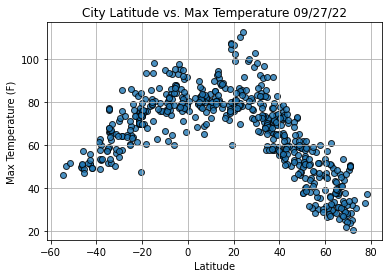

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properities. 
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

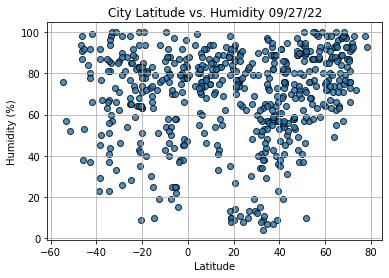

In [42]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properities. 
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

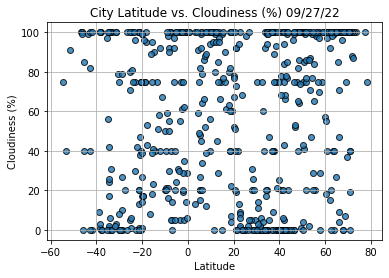

In [43]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

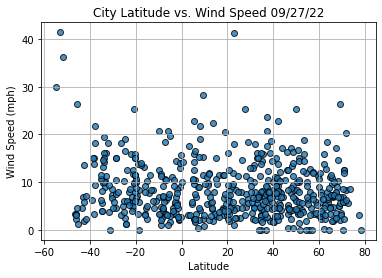

In [44]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [47]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data. 
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates): 
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [48]:
index13 = city_data_df.loc[13]
index13

City                Mount Gambier
Country                        AU
Date          2022-09-27 14:15:08
Lat                      -37.8333
Lng                      140.7667
Max Temp                    52.79
Humidity                       77
Cloudiness                    100
Wind Speed                   9.35
Name: 13, dtype: object

In [49]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

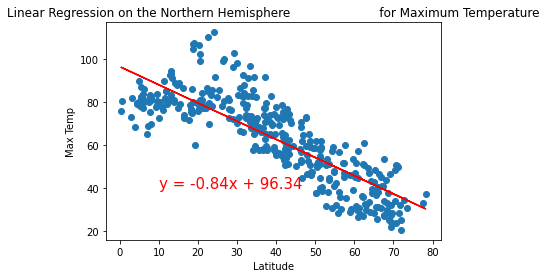

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function. 
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for Maximum Temperature', 'Max Temp',(10,40))

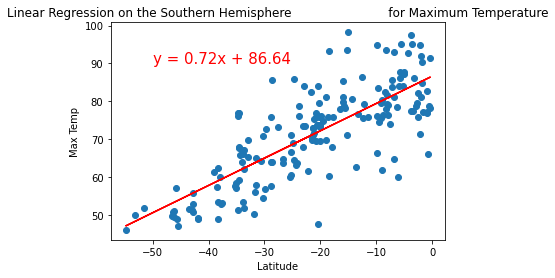

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

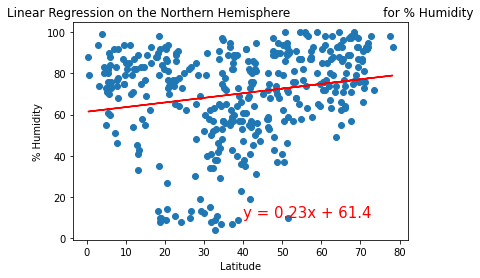

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
                        for % Humidity', '% Humidity',(40,10))

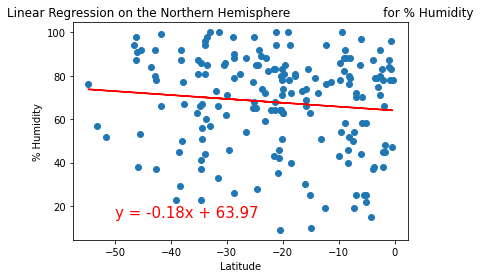

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
                        for % Humidity', '% Humidity',(-50,15))

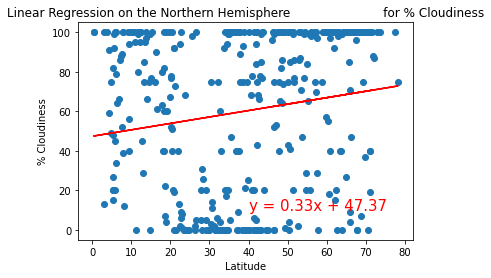

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
                        for % Cloudiness', '% Cloudiness',(40,10))

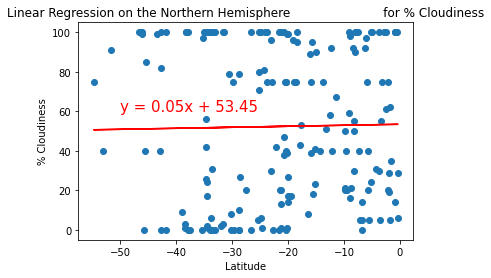

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
                        for % Cloudiness', '% Cloudiness',(-50,60))

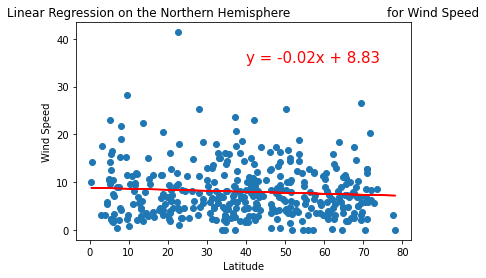

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

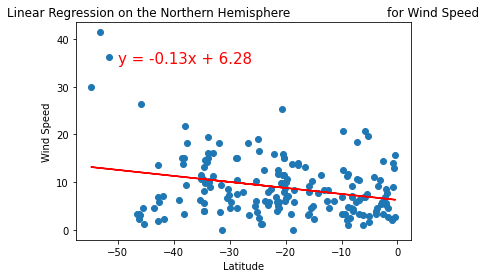

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))